The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [125]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

### Load the dataset and find the most common gender and birth country

In [109]:
nobel = pd.read_csv("data/nobel.csv")
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [126]:
## Store Top Gender
top_gender = nobel["sex"].value_counts().index[0]
## Store Top Country
top_country = nobel["birth_country"].value_counts().index[0]
## Display Top Gender
print(f"The gender with the most Nobel laureates is : {top_gender}")
## Display Top Country
print(f"The most common birth country of Nobel laureates is : {top_country}")

The gender with the most Nobel laureates is : Male
The most common birth country of Nobel laureates is : United States of America


### Identify the decade with the highest proportion of US-born winners

the decade with the highest proportion of US-born winners : 2000


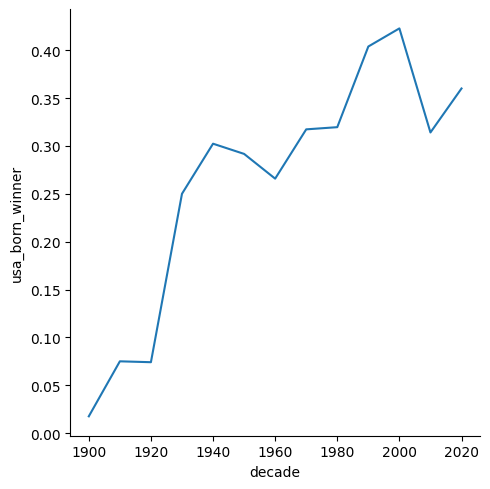

In [127]:
## Country == "USA"
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'

## decade a period of ten years.
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)

## propotion of USA born wineers per decade
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

## Highest Propotion
## prop_usa_winners["usa_born_winner"].max()
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner'] == prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]
print(f"the decade with the highest proportion of US-born winners : {max_decade_usa}")

_ = sns.relplot(x="decade", y="usa_born_winner", data=prop_usa_winners, kind="line")
## plt.title("proportion of US-born winners Vs. decade.")

### Find the decade and category with the highest proportion of female laureates.

In [132]:
## Sex == "F"
nobel['female_winner'] = nobel['sex'] == 'Female'

## female winner groupby decade && category 
prop_female_winners = nobel.groupby(["decade", "category"], as_index=False)["female_winner"].max()

## the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]

## Dict(decade:category)
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}
print(max_female_dict)
## plot using seaborn
## _ = sns.relplot(x='decade', y='female_winner', hue='category', data=prop_female_winners, kind="line")

{1900: 'Literature'}


### Find first woman to win a Nobel Prize.

In [130]:
## Female Winner 
nobel_women = nobel[nobel['female_winner']]

## find the first woman to win prize.
min_row = nobel_women[nobel_women["year"] == nobel_women["year"].min()]

## find her name and category
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")


 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.


### Determine repeat winners

In [131]:
## mmmmm.. repeat winners ? yes , mm (count of full name in the col. 2 or more)
counts = nobel["full_name"].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)
## Print 
print("The repeat winners are :", repeat_list)

The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
